In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy import io

plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
fisheriris_mat = io.loadmat(os.path.join('..', 'datasets', 'fisheriris.mat'))
meas = fisheriris_mat['meas']

x1 = meas[:50, :]  # setosa
x2 = meas[50:100, :]  # versicolor
x3 = meas[100:, :]  # virginica

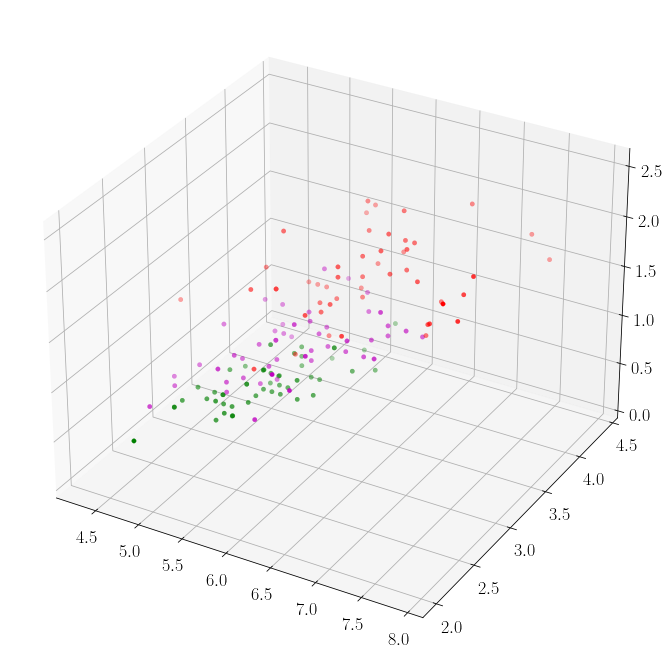

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 3], c='g', marker='o')
ax.scatter(x2[:, 0], x2[:, 1], x2[:, 3], c='m', marker='o')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 3], c='r', marker='o')

plt.show()

In [4]:
dogdata_mat = io.loadmat(os.path.join('..', 'datasets', 'dogData.mat'))
catdata_mat = io.loadmat(os.path.join('..', 'datasets', 'catData.mat'))

dogdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'catData_w.mat'))

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog, cat), axis=1)
CD2 = np.concatenate((dog_wave, cat_wave), axis=1)

u, s, vT = np.linalg.svd(CD - np.mean(CD), full_matrices=0)
u2, s2, vT2 = np.linalg.svd(CD2 - np.mean(CD2), full_matrices=0)

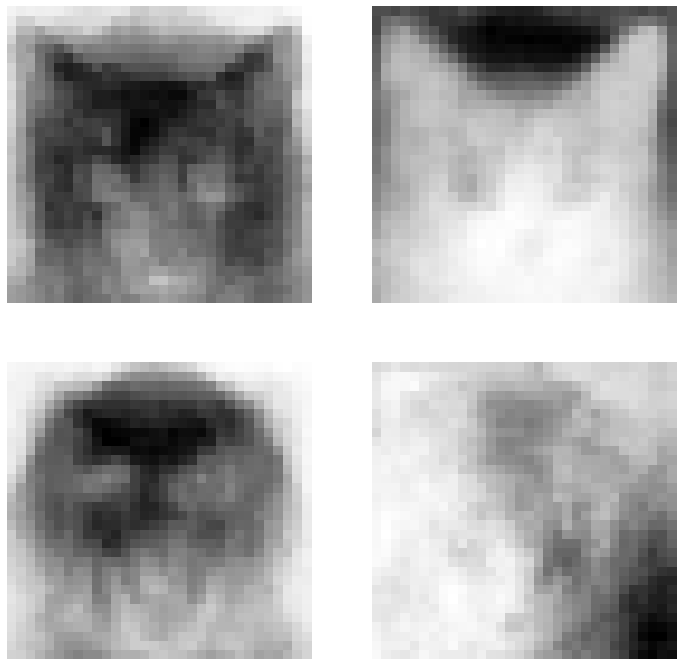

In [28]:
fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)
for j in range(4):
    U = np.flipud(np.reshape(u[:, j], (64, 64)))
    U2 = U[::2, ::2]
    axs[j].pcolor(np.rot90(U2), cmap='Greys')
    axs[j].axis('off')

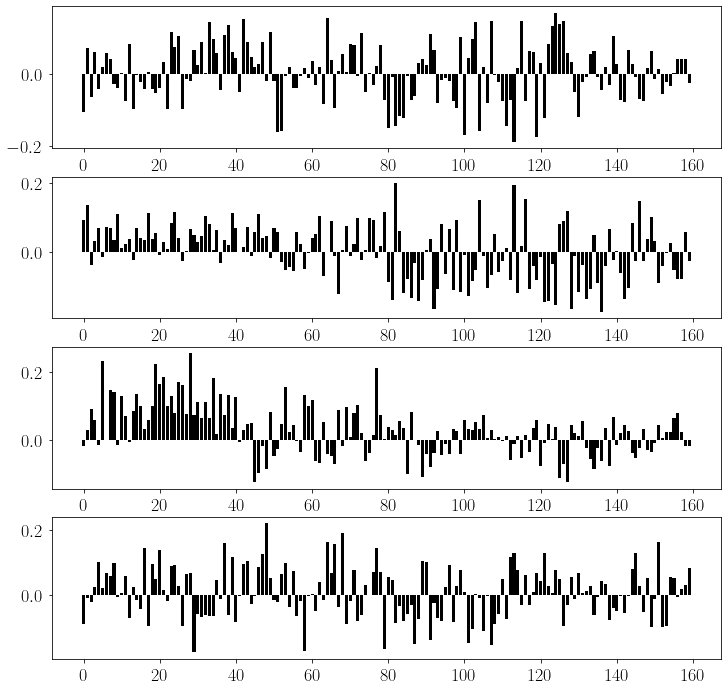

In [27]:
fig, axs = plt.subplots(4, 1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s)), vT[j, :], color='black')

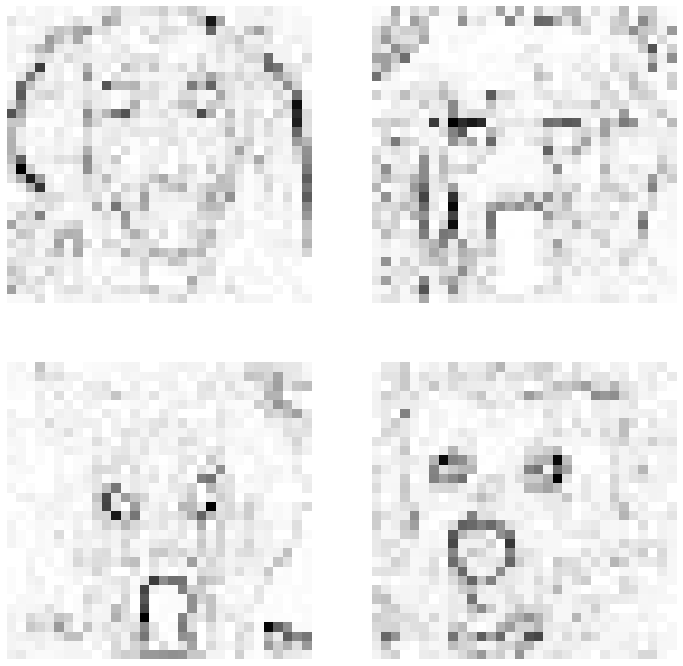

In [26]:
fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)
for j in range(4):
    Xd = np.flipud(np.reshape(dog_wave[:, j], (32, 32)))
    axs[j].pcolor(np.rot90(Xd), cmap='Greys')
    axs[j].axis('off')

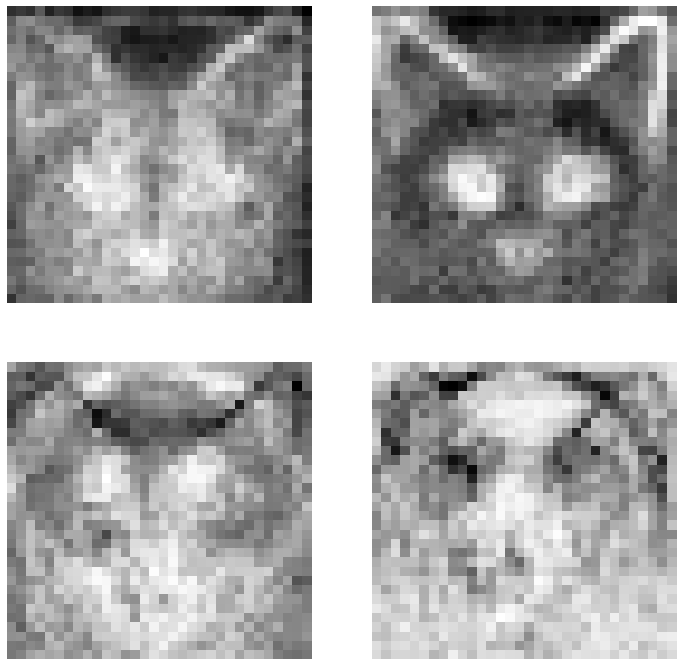

In [19]:
fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)
for j in range(4):
    U3 = np.flipud(np.reshape(u2[:, j], (32, 32)))
    axs[j].pcolor(np.rot90(U3), cmap='Greys_r')
    axs[j].axis('off')

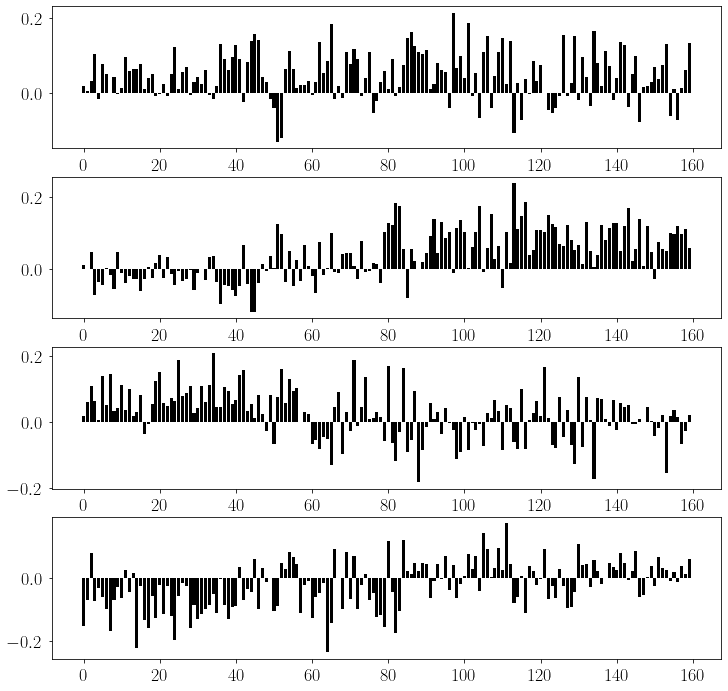

In [22]:
fig, axs = plt.subplots(4, 1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s2)), vT2[j, :], color='black')

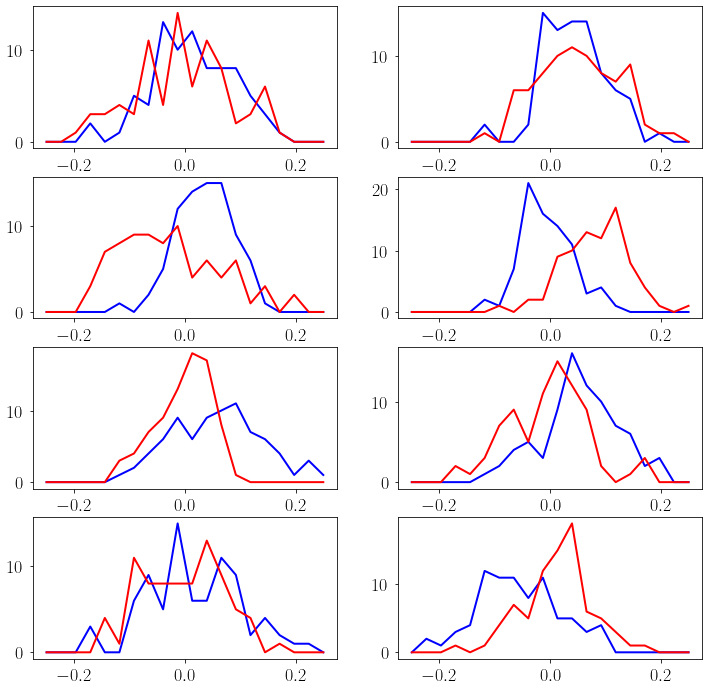

In [15]:
xbin = np.linspace(-0.25, 0.25, 20)
xbin_edges = np.append(xbin, xbin[-1] + (xbin[1] - xbin[0])) - (xbin[1] - xbin[0]) / 2
fig, axs = plt.subplots(4, 2)
for j in range(4):
    pdf1 = np.histogram(vT[j, :80], bins=xbin_edges)[0]
    pdf2 = np.histogram(vT[j, 80:], bins=xbin_edges)[0]
    axs[j, 0].plot(xbin, pdf1, label='dog', c='b', linewidth=2)
    axs[j, 0].plot(xbin, pdf2, label='cat', c='r', linewidth=2)

    pdf1 = np.histogram(vT2[j, :80], bins=xbin_edges)[0]
    pdf2 = np.histogram(vT2[j, 80:], bins=xbin_edges)[0]
    axs[j, 1].plot(xbin, pdf1, label='dog', c='b', linewidth=2)
    axs[j, 1].plot(xbin, pdf2, label='cat', c='r', linewidth=2)

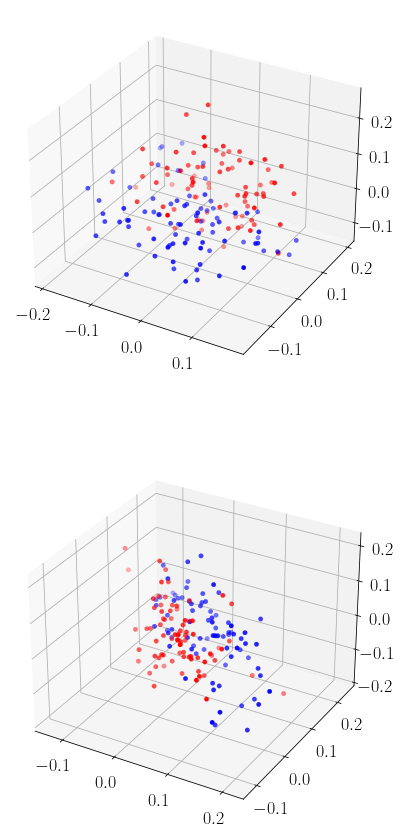

In [32]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(vT[0, :80], vT[1, :80], vT[2, :80], c='r', marker='o', s=20)
ax1.scatter(vT[0, 80:], vT[1, 80:], vT[2, 80:], c='b', marker='o', s=20)

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(vT2[0, :80], vT2[1, :80], vT2[2, :80], c='r', marker='o', s=20)
ax2.scatter(vT2[0, 80:], vT2[1, 80:], vT2[2, 80:], c='b', marker='o', s=20)

plt.show()

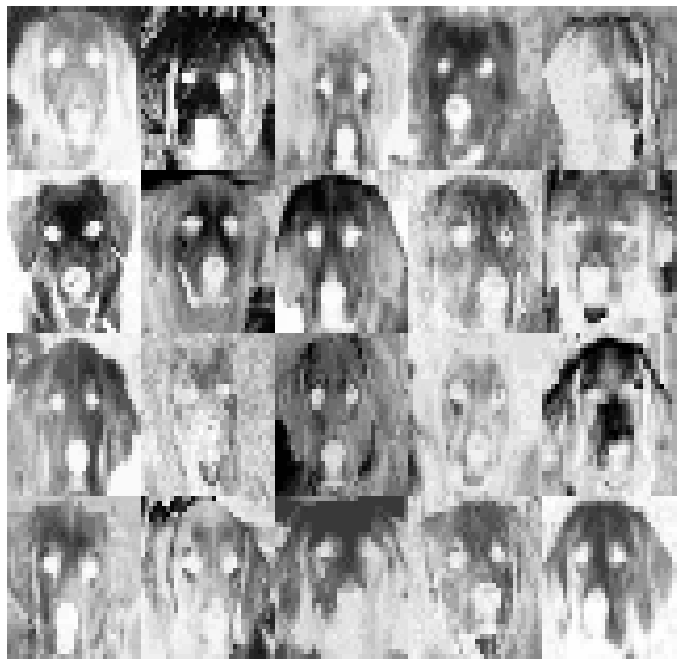

In [24]:
master = np.zeros((32 * 5, 32 * 4))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(dog[:, count], (64, 64)))
        T = T2[::2, ::2]
        master[32 * j:32 * (j + 1), 32 * jj:32 * (jj + 1)] = T
        count += 1

plt.figure()
plt.pcolor(np.rot90(master), cmap='Greys')
plt.axis('off')
plt.show()

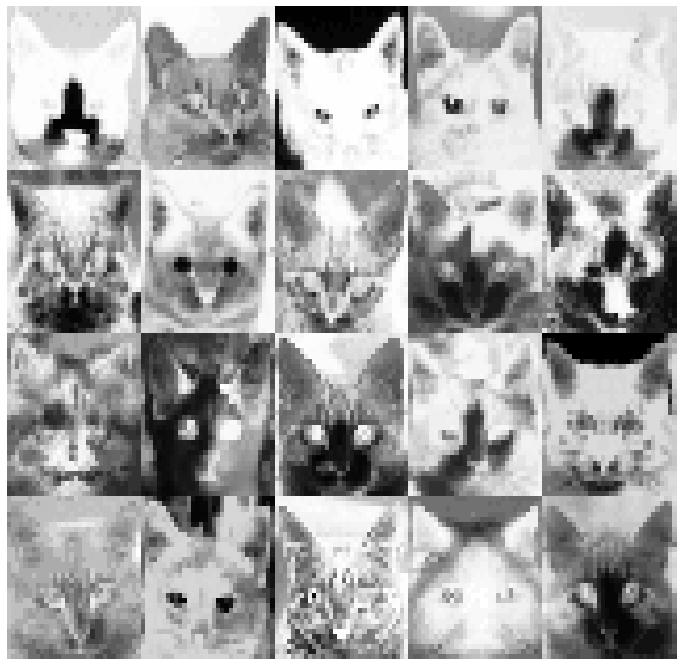

In [25]:
master = np.zeros((32 * 5, 32 * 4))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(cat[:, count], (64, 64)))
        T = T2[::2, ::2]
        master[32 * j:32 * (j + 1), 32 * jj:32 * (jj + 1)] = T
        count += 1

plt.figure()
plt.pcolor(np.rot90(master), cmap='Greys')
plt.axis('off')
plt.show()